# NPROS: A Not So Pure Random Orthogonal Search Algorithm –A Suite of Random Optimization Algorithms Driven by Reinforcement Learning

Published in: Optimization Letters Journal, Springer Publication [SCI Indexed].
Link to paper: https://link.springer.com/article/10.1007/s11590-023-02038-0
Link to PDF:

How to Cite:
Hameed, A.S.S.S., Rajagopalan, N. NPROS: A Not So Pure Random Orthogonal search algorithm—A suite of random optimization algorithms driven by reinforcement learning. Optim Lett (2023). https://doi.org/10.1007/s11590-023-02038-0

For Any suggestions or doubt mail to: shahulshan81@gmail.com Cite the paper, if you find it useful.

This is an easier to understand (heavily commented) version of the proposed NPROS algorithm suite.
For an experiment ready version of the proposed NPROS see the file titled: "NPROS (Experiment Ready Version).ipynb"

In [1]:
import numpy as np
import random
import threading
import time
import math, statistics

# A 2D and 50D Benchmark Function for Sample

How To Run:
Run any one of the benchmark function first. 
And then run the required cells for the algorithm to be tried out.

The code of the benchmark functions were taken from: https://github.com/nathanrooy/landscapes/blob/master/landscapes/single_objective.py

In [2]:
def f(x): #F1Ackley 
    x,y = x[0],x[1]
    '''
    Ackley Function
    wikipedia: https://en.wikipedia.org/wiki/Ackley_function
    global minium at f(x=0, y=0) = 0
    bounds: -35<=x,y<=35
    
    '''
    return (-20 * np.exp(-0.02 * np.sqrt(0.5 * (x*x + y*y))) -
            np.exp(0.5 * (np.cos(2.0*np.pi*x) + np.cos(2*np.pi*y))) + np.e + 20) #Ackley
mrnge = [-35,35]
optimum = 0 #Well known optimum value
D=2 #Dimesnion
episodes = 1000 #Number of steps or iterations for which the algorithm is to be run

In [ ]:
def f(xy): #F5griewank
    '''Griwank Function
    Bounds: x_i in [-600, 600] for all i=1,...,d
    Global minimum: f(x)=0 at x=(0,...,0)

    '''
    a, b, = 0, 1
    for i, v in enumerate(xy):
        a += v**2 / 4000.0
        b *= np.cos(v/np.sqrt(i+1))
    return a - b + 1
mrnge = [-100,100]
optimum = 0
D=50
episodes = 475000 #These values were recomended by the original PROS paper.

## PROS (The original Algorithm)

Source: https://www.mdpi.com/2076-3417/11/11/5053

In [3]:
#PROS
x = np.random.uniform(mrnge[0],mrnge[1], D)     #Randomly sampled initial point/candidate solution.
curr_best_estimate = f(x)                       #Temp variable to hold the best known location of the optimum as of now. It helps avoid unnecessary calls to the benchmark function
for _ in range (episodes):
    t = np.random.randint(D)                    #choose a dimension/component of the candidate soln randomly to modify.
    y = np.array(x)                             #np.array() is required for deep copy, or else shallow copy will occur.
    y[t] = np.random.uniform(mrnge[0],mrnge[1]) #At this point the new location y is orthogonal to x.
    if(f(y) < curr_best_estimate):              #If new location is better.
        x = y                                   #Remember the new location.
        curr_best_estimate = f(x)               #Remember the new location's function value.
print(f(x))                                     #Print the best obtained minima value.

0.04331490113209213


### NPROS Suite of Algorithm Starts

In [4]:
#This funtion needs to be executed, for (any of) the NPROS algorithms to run
def is_in_fsble_rgn (var) : #If the point 'var' is out of bounds sample a new one within bounds. #The new point may go out of bounds because, unlike uniform distibutuion (which is strictly bounded) the normal and lognormal distribution may generate point outside the bounds if the mean is at the extremes.
    if math.floor (var) not in np.arange(mrnge[0],mrnge[1]):
        return np.random.uniform(mrnge[0],mrnge[1])
    else:
        return var

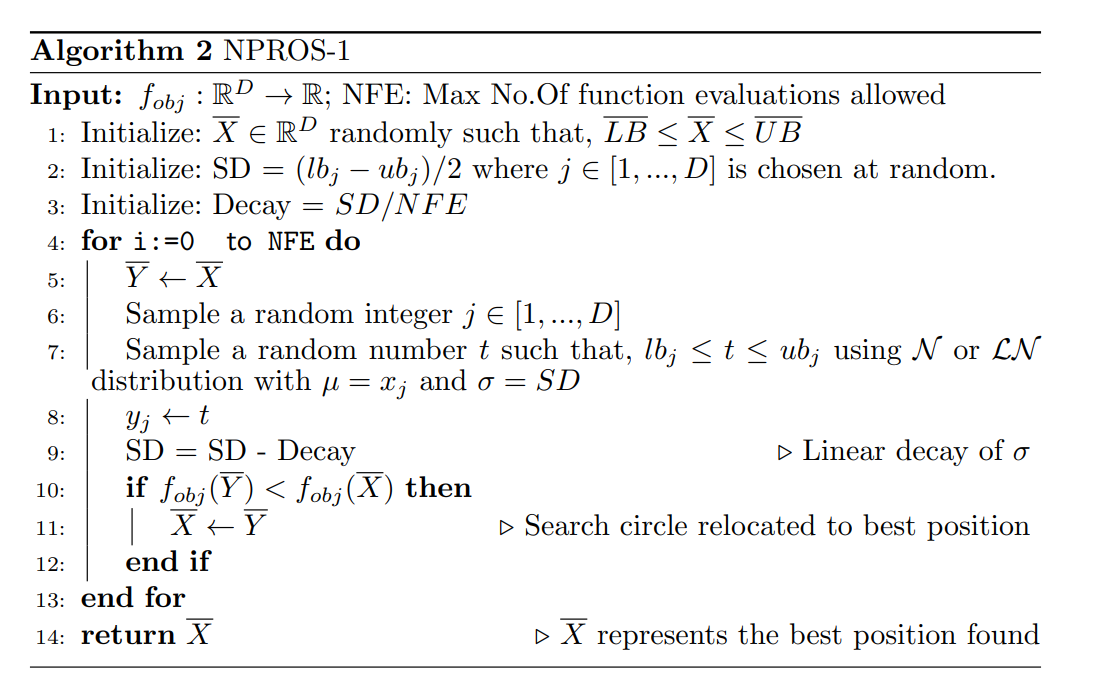

## NPROS - 1.1 (Normal Distribution)

In [5]:
#Initialization of required variables. Run this before running NPROS_1.1

SD = (mrnge[1] - mrnge[0])/2                 #Standard Deviation (sigma), aka Radius of the search cirle/hypersphere
decay = SD/episodes                          #Gradually/Linearly reduce the radius of the search circle.
x = np.random.uniform(mrnge[0],mrnge[1], D)  #Randomly sampled initial point/candidate solution.
curr_best_estimate = f(x)                    #Temp variable to avoid unnecessary calls to the benchmark function.

In [6]:
#NPROS_1.1 Algorithm 
for _ in range (episodes):
    t = np.random.randint(D)                        #Choose a dimension/component of the candidate soln randomly to modify.
    y = np.array(x)
    y[t] = np.random.normal(loc = x[t],scale = SD)  #loc=Mean;scale=sigma. Normal distribution is used to sample new points, with the mean set to x[t], i.e. the current best known location is the mean.
    y[t] = is_in_fsble_rgn(y[t])                    #If sampled point is out of bounds, sample new one within bounds (may happen rarely for some benchmark functions)

    SD = SD-decay                                   #Reduce the radius of the search circle (std deviation) linearly.
    
    if(f(y) < curr_best_estimate):                  #If new location is better.
        x = y                                       #Remember the new location.
        curr_best_estimate = f(x)                   #Remember the new location's function value.
print(f(x))

0.0016951014205304205


## NPROS - 1.2 (LogNormal Distribution)

In [7]:
#Initialization of required variables. Run this before running NPROS_1.1

SD = (mrnge[1] - mrnge[0])/2                 #Standard Deviation (sigma), aka Radius of the search cirle/hypersphere
decay = SD/episodes                          #Gradually/Linearly reduce the radius of the search circle.
x = np.random.uniform(mrnge[0],mrnge[1], D)  #Randomly sampled initial point/candidate solution.
curr_best_estimate = f(x)                    #Temp variable to avoid unnecessary calls to the benchmark function.

In [8]:
#NPROS_1.2 Algorithm 
for _ in range (episodes):
    t = np.random.randint(D)                            #Choose a dimension/component of the candidate soln randomly to modify.
    y = np.array(x)
    y[t] = np.random.lognormal(mean = x[t],sigma = SD)  #sigma=standard deviation. LogNormal distribution is used to sample new points, with the mean set to x[t], i.e. the current best known location is the mean.
    y[t] = is_in_fsble_rgn(y[t])                        #If sampled point is out of bounds, sample new one within bounds (may happen rarely for some benchmark functions)

    SD = SD-decay                                       #Reduce the radius of the search circle (std deviation) linearly.
    
    if(f(y) < curr_best_estimate):                      #If new location is better.
        x = y                                           #Remember the new location.
        curr_best_estimate = f(x)                       #Remember the new location's function value.
print(f(x))

0.0


# NPROS - 2 (Bandit - RL Based Meta Algorithm)

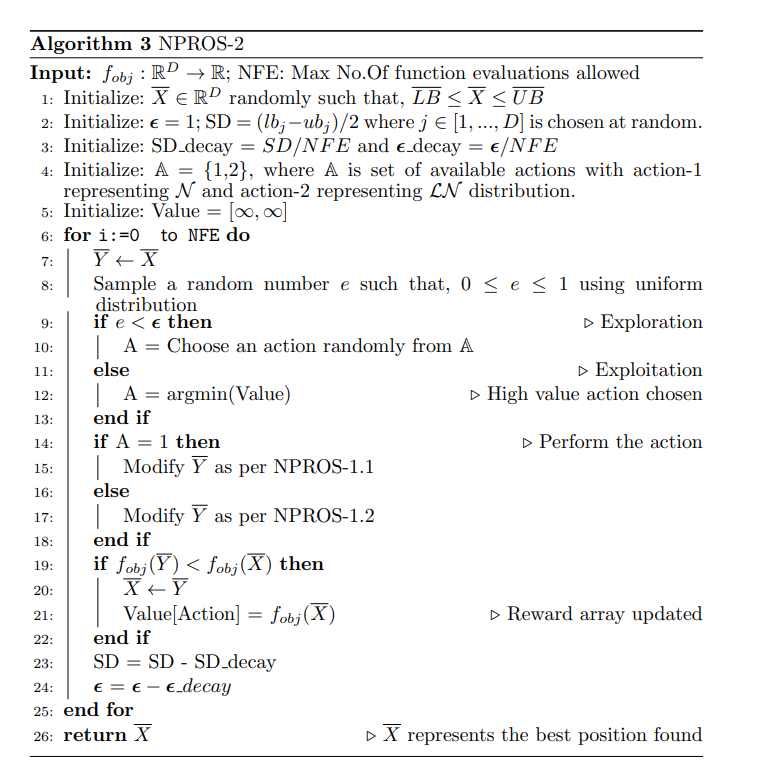

In [9]:
#Initialization of required variables for NPROS-2
scl = (mrnge[1] - mrnge[0])/2                  #Standard Deviation (sigma), aka Radius of the search cirle/hypersphere. Common for both Normal and LogNormal distribution.
scl_decay = scl/episodes                       #Gradually/Linearly reduce the radius of the search circle.
x = np.random.uniform(mrnge[0],mrnge[1], D)    #Randomly sampled initial point/candidate solution.
curr_best_estimate = f(x)                      #Temp variable to avoid unnecessary calls to the benchmark function.
epsilon = 1                                    #Initialize the epsilon value for epsilon greedy strategy.
eps_decay = epsilon/episodes                   #Decay value for epsilon greedy strategy.
value = [9999999999,9999999999]                #Reward Array. Since we are doing minimization 

In [10]:
#NPROS 2 (Meta - MAB Based) Algorithm
for _ in range (episodes):
    t = np.random.randint(D)                                    #Choose a dimension/component of the candidate soln randomly to modify.
    y = np.array(x)
    scl = scl-scl_decay                                         #Reduce the radius of the search circle (std deviation) linearly.
    
    if (random.uniform(0,1) < epsilon):#EXPLORE
        action = np.random.randint(2)                           #Choose an action/distribution randomly, to see how well it performs with the given benchmark function.
        if (action == 0):
            y[t] = np.random.normal(loc = x[t],scale = scl)  
        else:
            y[t] = np.random.lognormal(mean = x[t],sigma = scl) #Note that, both the action/distribution updates the same variable. Given a candidate solution, it can be updated by any of the two distributions.

    else: #EXPLOIT
        if (np.argmin(value) == 0):                             #Choose the action which yielded the best minimization performance in the past (until this current iteration).
            y[t] = np.random.normal(loc = x[t],scale = scl)  
        else:
            y[t] = np.random.lognormal(mean = x[t],sigma = scl)
            
    y[t] = is_in_fsble_rgn(y[t])                                #If sampled point is out of bounds, sample new one within bounds (may happen rarely for some benchmark functions)
    if(f(y) < curr_best_estimate):                              #If new location is better.
        x = y                                                   #Remember the new location.
        curr_best_estimate = f(x)                               #Remember the new location's function value.
        value[action] = f(x)                                    #Remember the chosen action's OP performance in the corresponding entry of the Value matrix. 
        
    epsilon = epsilon - eps_decay                               #Decay the epsilon value linearly. The algorithm starts with high exploration, and gradually moves into high exploitation towards the end.
print(f(x))                                                     #Print the best obtained minima value.

0.0


### Some Important Figures

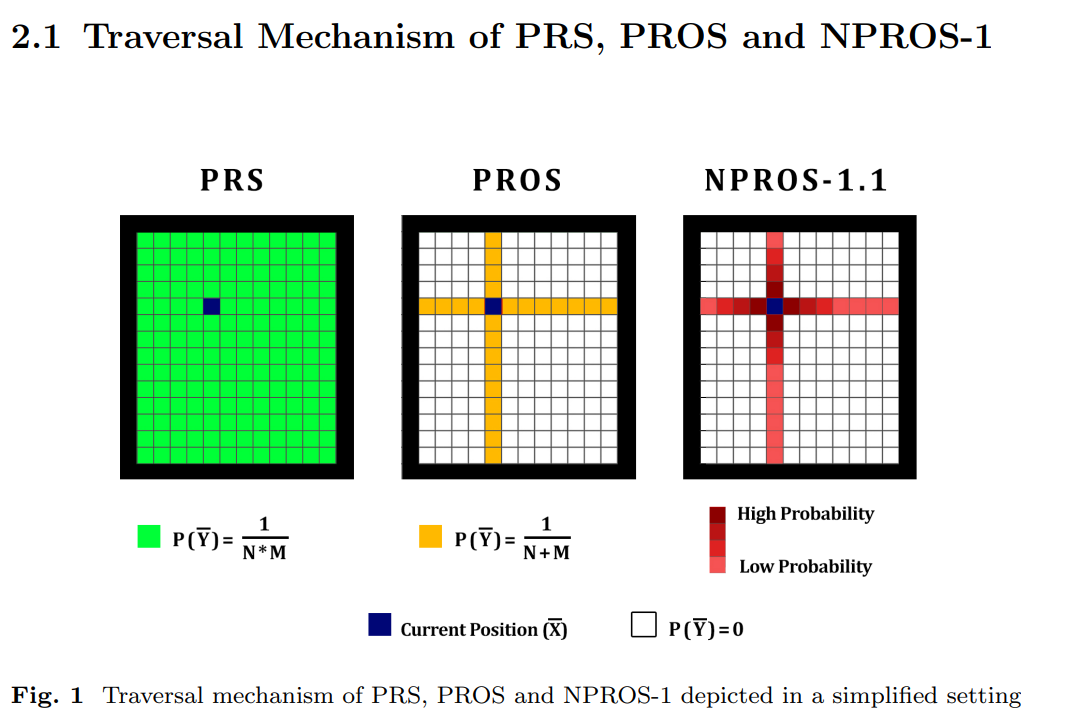